<h1 style="text-align: center;">
Exploratory Data Analysis
</h1>
<h3 style="text-align: center;">
Get to know the data
</h3>

### 1. Introduction

The data contains different characteristics of jobs from an unknown grid computing, it is provided by **The Grid Workloads Archive** and can be found [here](http://gwa.ewi.tudelft.nl/datasets/gwa-t-1-das2). The following key points are the a summary of what to expect from the data :
<ul>
<li>Date first entry: Tue Feb 22 16:52:25 2005</li>
<li>CPU time consumed by jobs: 68y 230d 21h 30m 0s</li>
<li>Number of sites in the system: 5</li>
<li>Number of CPUs in the trace: 400</li>
<li>Number of jobs in the trace: 1124772</li>
<li>Number of users in the trace: 333</li>
<li>Number of groups in the trace: 12</li>
<ul>

<p style="text-align : right;">source : <a href="http://gwa.ewi.tudelft.nl/datasets/gwa-t-1-das2/report/">Trace analysis report GWA-DAS2</a><p>

### 2. Detailed description of the available Features 

<ul>
    <li><span style="font-weight: bold;">JobID</span>		counter</li>
    <li><span style="font-weight: bold;">SubmitTime</span>		in seconds, starting from zero</li>
    <li><span style="font-weight: bold;">WaitTime</span>		in seconds</li>
    <li><span style="font-weight: bold;">RunTime</span> 		runtime measured in wallclock<sup>1</sup> seconds</li>
    <li><span style="font-weight: bold;">NProcs</span>		number of allocated processors</li>
    <li><span style="font-weight: bold;">AverageCPUTimeUsed</span>	average of CPU time over all allocated processors</li>
    <li><span style="font-weight: bold;">Used Memory</span>	average per processor in kilobytes</li>
    <li><span style="font-weight: bold;">ReqNProcs</span>		requested number of processors</li>
    <li><span style="font-weight: bold;">ReqTime</span>: 		requested time measured in wallclock seconds</li>
    <li><span style="font-weight: bold;">ReqMemory</span>		requested memory (average per processor)</li>
    <li><span style="font-weight: bold;">Status</span>		job completed = 1, job failed = 0, job cancelled = 5</li>
    <li><span style="font-weight: bold;">UserID</span>		string identifier for user</li>
    <li><span style="font-weight: bold;">GroupID</span>		string identifier for group user belongs to</li>
    <li><span style="font-weight: bold;">ExecutableID</span>	name of executable</li>
    <li><span style="font-weight: bold;">QueueID</span>		string identifier for queue</li>
    <li><span style="font-weight: bold;">PartitionID</span>	string identifier for partition</li>
    <li><span style="font-weight: bold;">OrigSiteID</span>		string identifier for submission site</li>
    <li><span style="font-weight: bold;">LastRunSiteID</span>	string identifier for execution site</li>
    <li><span style="font-weight: bold;">JobStructure</span>	single job = UNITARY, composite job = BoT</li>
    <li><span style="font-weight: bold;">JobStructureParams</span> if JobStructure = BoT, contains batch identifier</li>
    <li><span style="font-weight: bold;">UsedNetwork</span>	used network resources in kilobytes/second</li>
    <li><span style="font-weight: bold;"> UsedLocalDiskSpace</span>	in megabytes</li>
    <li><span style="font-weight: bold;">UsedResources</span>	list of comma-separated generic resources (ResourceDescription:Consumption)</li>
    <li><span style="font-weight: bold;">ReqPlatform</span>	CPUArchitecture,OS,OSVersion</li>
    <li><span style="font-weight: bold;">ReqNetwork</span>		in kilobytes/second</li>
    <li><span style="font-weight: bold;">ReqLocalDiskSpace</span>	in megabytes</li>
    <li><span style="font-weight: bold;">ReqResources</span>	list of comma-separated generic resources (ResourceDescription:Consumption)</li>
    <li><span style="font-weight: bold;">VOID</span>		identifier for Virtual Organization</li>
    <li><span style="font-weight: bold;">ProjectID</span>		identifier for project</li>
</ul>

<p>(1) : Wall-clock time is the time that a clock on the wall (or a stopwatch in hand) would measure as having elapsed between the start of the process and 'now'.</p>

### 3. Data Analysis

#### Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

In [2]:
dataset = pd.read_csv('anon_jobs.csv')

# set pandas to show all columns
pd.set_option('display.max_columns', None)

# print the first 5 rows of the dataset
dataset.head(10)

C:\Users\nouro\AppData\Local\Temp\ipykernel_35592\810405783.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('anon_jobs.csv')


,JobID,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,ReqMemory,Status,UserID,GroupID,ExecutableID,QueueID,PartitionID,OrigSiteID,LastRunSiteID,JobStructure,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
0,1,1109087545,9,21,1,0.05,8282.112,1,-1.0,-1.0,1,U0,G0,X0,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
1,2,1109087546,8,21,1,0.08,10485.760,1,-1.0,-1.0,1,U0,G0,X0,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
2,3,1109087609,5,1,1,0.00,2584.576,1,-1.0,-1.0,1,U0,G0,X1,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
3,4,1109091229,15,0,1,0.00,0.000,1,-1.0,-1.0,1,U0,G0,X1,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
4,5,1109091214,65162,1,1,0.00,0.000,1,-1.0,-1.0,1,U0,G0,X1,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
5,6,1109092121,64255,1,1,0.00,0.000,1,-1.0,-1.0,1,U0,G0,X1,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
6,7,1109090970,65438,0,2,0.00,0.000,2,-1.0,-1.0,1,U0,G0,X1,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
7,8,1109161778,14,3,1,0.08,11358.208,1,-1.0,-1.0,1,U0,G0,X2,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
8,9,1109162032,14,0,1,0.00,0.000,1,-1.0,-1.0,1,U0,G0,X2,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1
9,10,1109162805,6,0,1,0.00,0.000,1,-1.0,-1.0,1,U0,G0,X3,Q0,-1,DAS2/fs0,DAS2/fs0,UNITARY,-1,-1.0,-1.0,-1,-1,-1.0,-1.0,-1,-1,-1


In [3]:
print(f"Number of rows : {dataset.shape[0]}")

Number of rows : 1124772


#### Check the columns with missing values

In [4]:
# print column names which have one unique value to check if it is -1 for all rows (unavailable information)
for i in dataset.columns:
    unique_values = dataset[i].unique()
    if len(unique_values) == 1:
        print(i)
        print(unique_values)

ReqMemory
[-1.]
PartitionID
[-1]
UsedNetwork
[-1.]
UsedLocalDiskSpace
[-1.]
UsedResources
[-1]
ReqPlatform
[-1]
ReqNetwork
[-1.]
ReqLocalDiskSpace
[-1.]
ReqResources
[-1]
VOID
[-1]
ProjectID
[-1]


The following columns have missing values : ReqMemory, PartitionID, UsedNetwork, UsedLocalDiskSpace, UsedResources, ReqPlatform, ReqNetwork, ReqLocalDiskSpace, ReqResources, VOID, ProjectID. We can delete these columns since they are not relevant for our analysis.

In [5]:
dataset = dataset.drop(columns=['ReqMemory', "PartitionID", 'UsedNetwork', "ReqPlatform", 'ReqNetwork', 'UsedLocalDiskSpace', 'ReqLocalDiskSpace', 'UsedResources', 'ReqResources', "VOID", "ProjectID"])

#### General overview about the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124772 entries, 0 to 1124771
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   JobID               1124772 non-null  int64  
 1   SubmitTime          1124772 non-null  int64  
 2   WaitTime            1124772 non-null  int64  
 3   RunTime             1124772 non-null  int64  
 4   NProc               1124772 non-null  int64  
 5   UsedCPUTime         1124772 non-null  float64
 6   UsedMemory          1124772 non-null  float64
 7   ReqNProcs           1124772 non-null  int64  
 8   ReqTime             1124772 non-null  float64
 9   Status              1124772 non-null  int64  
 10  UserID              1124772 non-null  object 
 11  GroupID             1124772 non-null  object 
 12  ExecutableID        1124772 non-null  object 
 13  QueueID             1124772 non-null  object 
 14  OrigSiteID          1124772 non-null  object 
 15  LastRunSiteID  

In [7]:
dataset.describe()

,JobID,SubmitTime,WaitTime,RunTime,NProc,UsedCPUTime,UsedMemory,ReqNProcs,ReqTime,Status
count,1.124772e+06,1.124772e+06,1.124772e+06,1.124772e+06,1.124772e+06,1.124772e+06,1.124772e+06,1.124772e+06,1.124772e+06,1.124772e+06
mean,5.623865e+05,1.141096e+09,4.317657e+02,3.697174e+02,4.306248e+00,3.405256e+01,4.589586e+04,4.306248e+00,4.655147e+03,9.989669e-01
std,3.246939e+05,1.401233e+07,3.595336e+03,3.938101e+03,6.361762e+00,3.083070e+02,3.464246e+05,6.361762e+00,2.838875e+05,3.212525e-02
min,1.000000e+00,1.109088e+09,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.811938e+05,1.130606e+09,4.000000e+00,1.500000e+01,1.000000e+00,1.000000e-02,4.276224e+03,1.000000e+00,9.000000e+02,1.000000e+00
50%,5.623865e+05,1.140470e+09,6.000000e+00,4.700000e+01,2.000000e+00,3.000000e-02,6.348800e+03,2.000000e+00,9.000000e+02,1.000000e+00
75%,8.435792e+05,1.149950e+09,1.400000e+01,1.460000e+02,4.000000e+00,8.000000e-02,1.044480e+04,4.000000e+00,9.600000e+02,1.000000e+00
max,1.124772e+06,1.166002e+09,1.302269e+06,5.483630e+05,1.280000e+02,5.107015e+04,4.294951e+06,1.280000e+02,6.000000e+07,1.000000e+00


We are not going to use all of the features, to choose what features to use we first make some analysis to support the assumptions we may have, before choosing the task we will achieve with the data. Afterwards, we can use PCA or other dimensionality reduction techniques to reduce the number of features related to our task.

#### Used vs Requested Resources

In this section, we will compare the used and requested ressources. The features that may be interesting for the following comparison are :
<ul>
  <li>RunTime <strong>Vs.</strong> ReqTime : compare the expected time and the time the job really took.</li>
  <li>NProcs <strong>Vs.</strong> ReqNProcs : compare the expected number of processors and the processors the job really took.</li>
  <li>UsedMemory <strong>Vs.</strong> ReqMemory : compare the expected memory and the memory the job really took. However, all requested memory are equal to -1, which means that the infromation is not available.</li>
</ul>

Comparing number of used and requested processes
Comparing used and requested run time


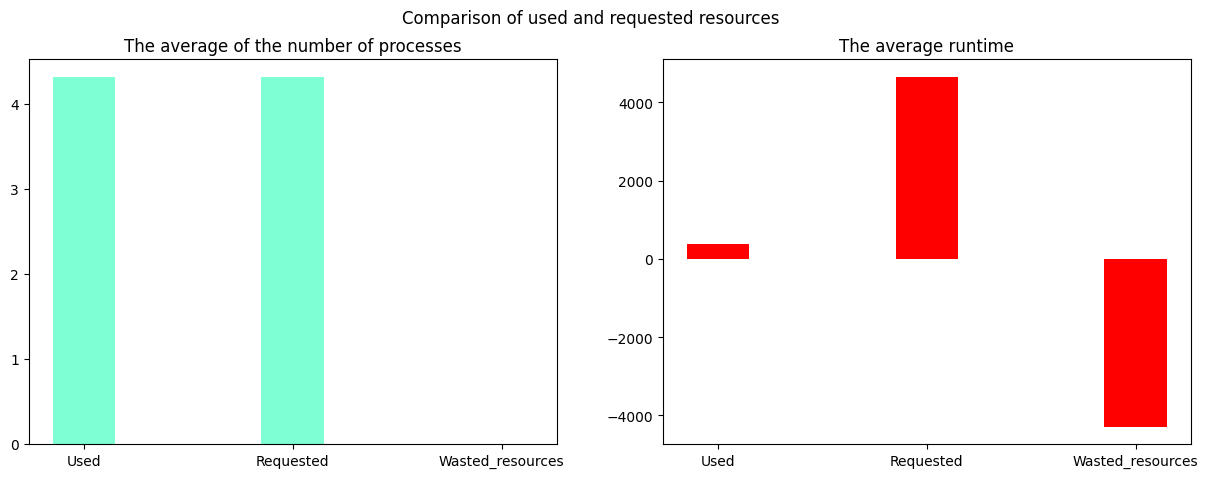

In [8]:
# Categories
categories = ["Used", "Requested", "Wasted_resources"]

# Initialize Figure
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Comparison of used and requested resources')

# Number of processes
print("Comparing number of used and requested processes")
nprocs_u = dataset["NProc"].mean()
nprocs_r = dataset["ReqNProcs"].mean()
values_Nprocs = [nprocs_u, nprocs_r, nprocs_u - nprocs_r]
axs[0].set_title("The average of the number of processes")
axs[0].bar(categories, values_Nprocs, width=0.3, color='aquamarine')

# Run time
print("Comparing used and requested run time")
runtime_u = dataset["RunTime"].mean()
runtime_r = dataset["ReqTime"].mean()
values_runtime = [runtime_u, runtime_r, runtime_u - runtime_r]
axs[1].set_title("The average runtime")
axs[1].bar(categories, values_runtime, width=0.3, color='red')
plt.show()


<strong>Conclusion : </strong> We can omit several features that represent missing values. Which are :  ReqMemory, UsedNetwork, ReqNetwork, UsedLocalDiskSpace, ReqLocalDiskSpace, UsedResources, ReqResources. In addition to that, we can see that the requested time is much more high than the actual time. Which means that we can try to understand the reason behind that.

In [9]:
# delete the columns that are not needed : ReqMemory, UsedNetwork, ReqNetwork, UsedLocalDiskSpace, ReqLocalDiskSpace, UsedResources, ReqResources
dataset = dataset.drop(columns=['ReqMemory', 'UsedNetwork', 'ReqNetwork', 'UsedLocalDiskSpace', 'ReqLocalDiskSpace', 'UsedResources', 'ReqResources'])

KeyError: "['ReqMemory', 'UsedNetwork', 'ReqNetwork', 'UsedLocalDiskSpace', 'ReqLocalDiskSpace', 'UsedResources', 'ReqResources'] not found in axis"

#### Distribution of job status

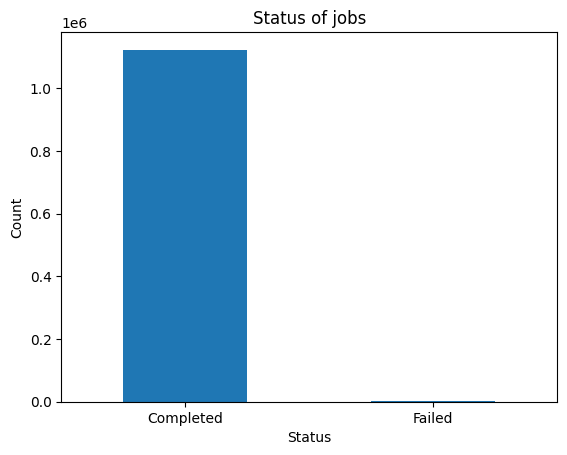

Number of completed jobs : 1123610 and the number of failes jobs : 1162 


In [10]:
# Job status
status_counts = dataset['Status'].value_counts()
status_counts.plot(kind='bar', rot=0)
plt.title('Status of jobs')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Completed', 'Failed'])
plt.show()
print(f"Number of completed jobs : {status_counts[1]} and the number of failes jobs : {status_counts[0]} ")

#### Other unimportant features

In [11]:
print(dataset['JobStructureParams'].value_counts())

JobStructureParams
-1          600484
-1          418748
fs336931      7000
fs336936      6995
fs336960      6000
             ...  
fs315384         1
fs315385         1
fs315380         1
fs315377         1
fs314769         1
Name: count, Length: 1958, dtype: int64


In [12]:
print(dataset['JobStructure'].value_counts())

JobStructure
UNITARY    1019232
BoT         105540
Name: count, dtype: int64


In [13]:
print(dataset['QueueID'].value_counts())

QueueID
Q0    1124272
Q1        451
Q2         49
Name: count, dtype: int64


We can notice that the OrigSiteID and LastRunSiteID have the same pieces of information, so we can delete one of them.

In [14]:
print(dataset['OrigSiteID'].value_counts())

OrigSiteID
DAS2/fs0    536583
DAS2/fs3    227809
DAS2/fs2    139162
DAS2/fs4    116977
DAS2/fs1    104241
Name: count, dtype: int64


In [15]:
print(dataset['LastRunSiteID'].value_counts())

LastRunSiteID
DAS2/fs0    536583
DAS2/fs3    227809
DAS2/fs2    139162
DAS2/fs4    116977
DAS2/fs1    104241
Name: count, dtype: int64


In [16]:
dataset = dataset.drop(columns=['LastRunSiteID'])

Distribution of the number of jobs per user

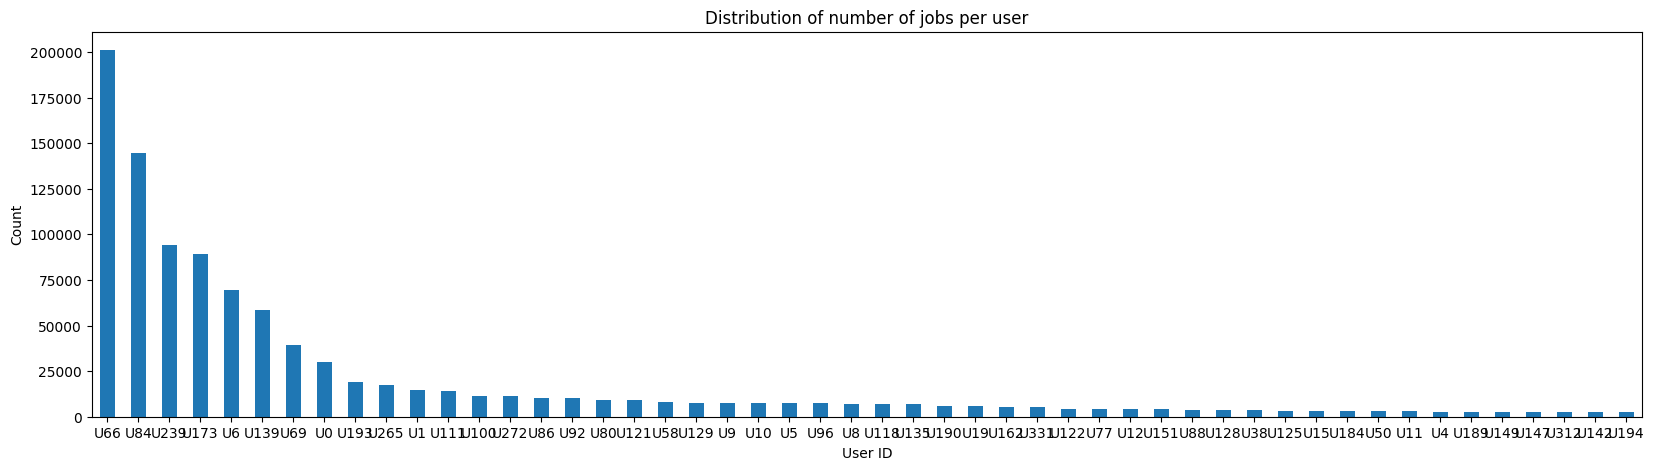

In [25]:
users = dataset["UserID"].value_counts()[0:50]
plt.figure(figsize=(20, 5))
users.plot(kind='bar', rot=0)
plt.title('Distribution of number of jobs per user')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.show()

Contingency table of user ID and group ID

In [47]:
contingency_table = pd.crosstab(dataset['UserID'], dataset['GroupID'])#, dataset["ExecutableID"], dataset["QueueID"], dataset["OrigSiteID"])\
group_users = {}
for group_id in contingency_table.columns:
    users_in_group = contingency_table[group_id][contingency_table[group_id] > 0].index.tolist()
    group_users[group_id] = users_in_group

# Print the result
for group_id, users in group_users.items():
    print(f"Users in Group {group_id}: {', '.join(users)}")

Users in Group G0: U0, U10, U101, U108, U11, U110, U115, U117, U118, U12, U124, U128, U13, U140, U145, U15, U16, U178, U186, U187, U19, U2, U25, U252, U278, U29, U313, U4, U53, U7, U72, U80, U9, U96, U99
Users in Group G1: U1, U106, U109, U112, U120, U137, U169, U224, U228, U24, U243, U244, U260, U268, U280, U65, U84, U86, U91, U98
Users in Group G10: U173
Users in Group G11: U291
Users in Group G2: U3
Users in Group G3: U104, U105, U107, U111, U113, U119, U127, U130, U138, U139, U146, U163, U17, U171, U172, U174, U175, U176, U177, U179, U18, U180, U181, U188, U191, U193, U195, U196, U197, U198, U199, U20, U200, U201, U202, U203, U204, U205, U206, U207, U208, U209, U210, U211, U212, U213, U214, U215, U216, U217, U218, U219, U220, U222, U223, U227, U229, U230, U231, U232, U233, U234, U235, U236, U237, U238, U239, U241, U247, U26, U262, U265, U27, U272, U276, U279, U28, U297, U298, U299, U30, U300, U301, U302, U303, U304, U305, U306, U307, U308, U309, U31, U310, U311, U312, U314, U315, U